In [1]:
import IPython.display as ipd
from scipy.io import wavfile

In [2]:
import os
os.chdir('/Users/haewonyum/Documents/Data Science_Reference/Kaggle/TensorFlow Speech Recognition Challenge')

In [3]:
import sys
sys.executable

'/Users/haewonyum/anaconda3/envs/kaggle/bin/python'

In [4]:
!ls

01_EDA           03_Winners_Code  data
02_Baseline      README.md        requirements.txt


In [7]:
# 음성 파일 경로를 지정한다
data_dir = './data/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/e4b02540_nohash_0.wav'

# 음성 데이터 읽어오기
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

# Player 실행
ipd.Audio(samples, rate=sample_rate)

/Users/haewonyum/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


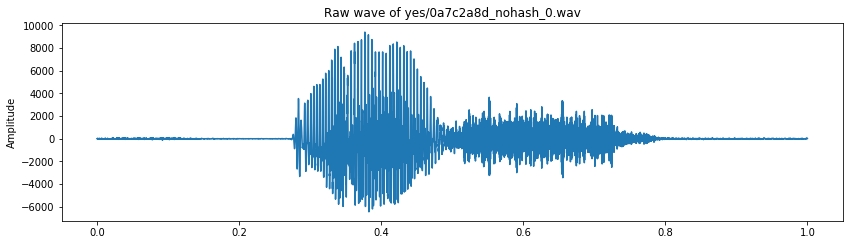

In [23]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display 

# 음성 파일 경로를 지정한다
data_dir = './data/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

# 음성 파형 (sound wave)를 시각화한다
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

Text(0.5, 0, 'Seconds')

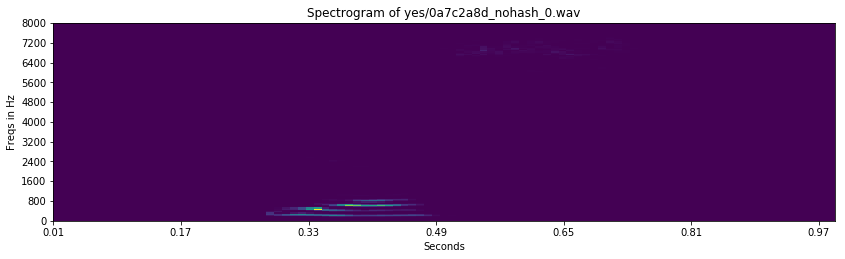

In [24]:
# 스펙트로그램을 계산하는 함수
def specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, spec.T.astype(np.float32)

# 스펙트로그램을 시각화한다
freqs, times, spectrogram = specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Spectrogram of ' + filename)
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

Text(0.5, 0, 'Seconds')

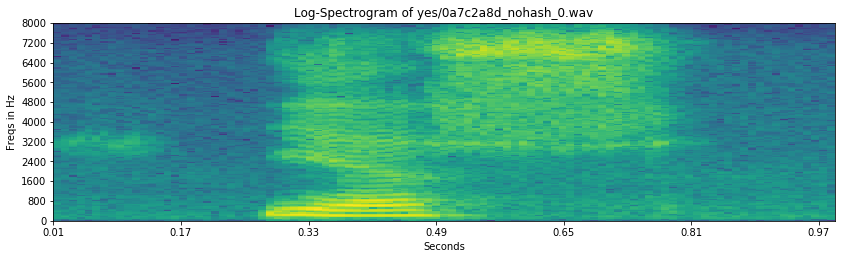

In [25]:
# log-스펙트로그램을 계산하는 함수
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# log-스펙트로그램을 시각화한다
freqs, times, log_spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(log_spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Log-Spectrogram of ' + filename)
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

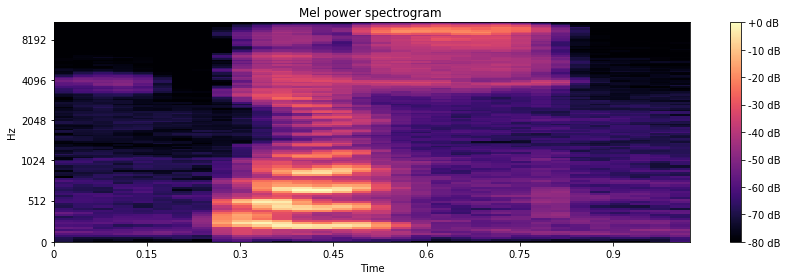

In [26]:
# mel-스펙트로그램을 계산하는 함수
S = librosa.feature.melspectrogram(samples.astype(np.float16), sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

# mel-스펙트로그램을 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

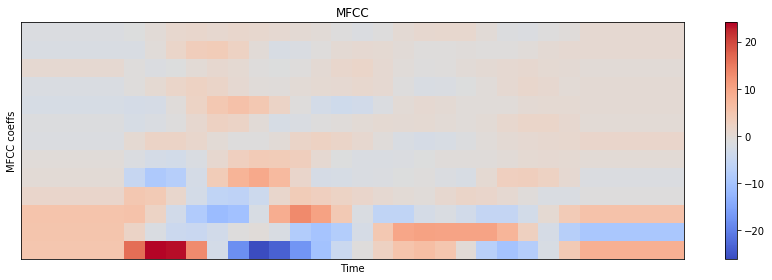

In [27]:
# MFCC를 계산하는 함수
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# MFCC를 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### p152. 이상값을 찾기 위해 FFT로 변환한 음성 데이터를 PCA를 통해 축소한 후, 2차원으로 시각화하는 코드

In [90]:
import numpy as np
import scipy
from scipy.fftpack import fft
from sklearn.decomposition import PCA

In [13]:
# sample_rate, samples 확인
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
samples.shape
samples[:10]

array([   5, 1455, -853,  519,  584, -389,  321, -205,  829, -426], dtype=int16)

In [37]:
# fft 함수 테스트
N = samples.shape[0]
yf = fft(samples)
yf.shape
yf[:10] # fourier coefficient
vals = np.abs(yf[0:N//2]) * (2/N)
# vals = np.abs(yf)
vals

array([ 0.322875  ,  0.27820763,  0.16735822, ...,  0.00877177,
        0.005814  ,  0.00663589])

In [86]:
sample10 = samples[:10] #[ 18,  62,  42, -23, -45,  30,  81,  39, -45, -42]
y = (samples*np.exp(-2*scipy.pi*scipy.sqrt(-1)*2*np.arange(N)/N)).sum() 
y
# yf[2]

(51.944804890087653+1337.8577055270523j)

In [87]:

def custom_fft(y, fs): # y: 16,000개의 값을 가진 배열, fs: sample rate
    T = 1.0 / fs # 1/16,000 
    N = y.shape[0] # 16,000
    yf = fft(y) # fourier transform
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2) # 0부터 8,000까지의 공간을 8,000 구간으로 나눔
    vals = 2.0/N * np.abs(yf[0:N//2]) # 1/8,000 * yf[0:8000]의 절대값
    return xf, vals


In [29]:
train_audio_path = './data/train/audio/'
dirs = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
fft_all = []
names = []

for direct in dirs:
    waves = [f for f in os.listdir(train_audio_path + direct) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
        if samples.shape[0] != sample_rate:
            samples = np.append(samples, np.zeros((sample_rate - samples.shape[0], ))) # sample_rate만큼 길이를 맞춰줌 (그것보다 짧으면 0으로 채움)
        x, val = custom_fft(samples, sample_rate)
        fft_all.append(val)
        names.append(direct + '/' + wav)

fft_all = np.array(fft_all)

In [42]:
len(fft_all)
# names[0]

23682

In [88]:
fft_all[0]

array([ 0.611375  ,  0.06600651,  0.03297357, ...,  0.00268745,
        0.0060505 ,  0.00674929])

CPU times: user 19.2 s, sys: 13 s, total: 32.2 s
Wall time: 37.7 s


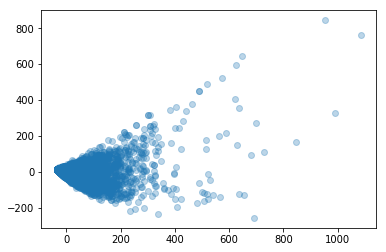

In [91]:
%%time
# 데이터를 정규화한다 (z-score)
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis=0)

# PCA를 통해 2차원으로 축소한다
pca = PCA(n_components=2)
fft_all = pca.fit_transform(fft_all)

# 축소된 데이터를 시각화한다
plt.scatter(x=fft_all[:,0], y=fft_all[:,1], alpha=0.3)

* 대부분의 데이터가 x축 성분 0~300 사이, y축 성분 -200~200 사이의 값을 가짐

In [92]:
# x 축 성분이 800보다 큰 4개의 값을 이상값으로 가정하고 파일명 확인

for i in np.where(fft_all[:,0] > 800)[0]:
    print(names[i])

yes/5165cf0a_nohash_0.wav
yes/e4b02540_nohash_0.wav
yes/617de221_nohash_1.wav
stop/de41f895_nohash_1.wav


In [101]:
# 이상값 데이터 직접 확인

outlier = ['yes/5165cf0a_nohash_0.wav', 'yes/e4b02540_nohash_0.wav', 'yes/617de221_nohash_1.wav', 'stop/de41f895_nohash_1.wav']
# filename = 'yes/5165cf0a_nohash_0.wav'

# 음성 데이터 읽어오기
sample_rate_list = []
samples_list = []
for i, filename in enumerate(outlier):
    sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
    sample_rate_list.append(sample_rate)
    samples_list.append(samples)

# Player 실행
    
ipd.Audio(samples_list[3], rate=sample_rate_list[3])    

### Data Augmentation

In [146]:
import IPython.display as ipd
from scipy.io import wavfile
import random

# 음성 파일 경로를 지정한다
# data_dir = '~/.kaggle/competitions/tensorflow-speech-recognition-challenge/'
# train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

# 음성 데이터을 읽어온다
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)



In [142]:
# 음성 위치를 200ms~800ms 사이의 값으로 랜덤하게 이동한다
shift_range = random.randint(200, 800)
# shift = sample_rate * 100 // 1000
shift = random.randint(-shift_range, shift_range)
a = -min(0, shift)
b = max(0, shift)
print(a, b)
print(shift_range)

0 168
572


In [143]:
sample_aug = np.pad(samples, (shift_range,0), "constant").astype(np.float16)
sample_aug = sample_aug[:len(sample_aug) - shift_range] 
sample_aug.shape

(16000,)

In [144]:
# Data Augmentation을 취한 음성 파일을 들어본다
ipd.Audio(sample_aug, rate=sample_rate)

In [197]:
# 음성 위치를 200ms~800ms 사이의 값으로 랜덤하게 이동한다 --->> ????? 사용하지도 않았음. 
shift_range = random.randint(200, 800)
shift = sample_rate * 100 // 1000
shift = random.randint(-shift, shift)
a = -min(0, shift)
b = max(0, shift)
sample_aug = np.pad(samples, (a, b), "constant").astype(np.float16)
sample_aug = sample_aug[:len(sample_aug) - a] if a else sample_aug[b:]

# 제공된 배경 소음 중, 랜덤으로 1초 가량의 소음을 추가한다
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
noise_filenames = [f for f in os.listdir(train_audio_path + '_background_noise_') if f.endswith('.wav')]
noise_filename = noise_filenames[random.randint(0, len(noise_filenames)-1)]
_, noise_samples = wavfile.read(str(train_audio_path) + '_background_noise_/' + noise_filename)
start_idx = random.randint(0, len(noise_samples) - 1 - sample_rate)
noise_samples = noise_samples[start_idx:(start_idx + sample_rate)]
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
sample_aug += max_ratio * random.random() * noise_samples.astype(np.float16)

# 파형의 높이를 스케일링한다
scale = random.uniform(0.75, 1.25)
sample_aug *= scale

# Data Augmentation을 취한 음성 파일을 들어본다
ipd.Audio(sample_aug, rate=sample_rate)

In [200]:
# start_idx = random.randint(0, len(noise_samples) - 1 - sample_rate)
noise_samples[start_idx:(start_idx + sample_rate)]
start_idx 

269591

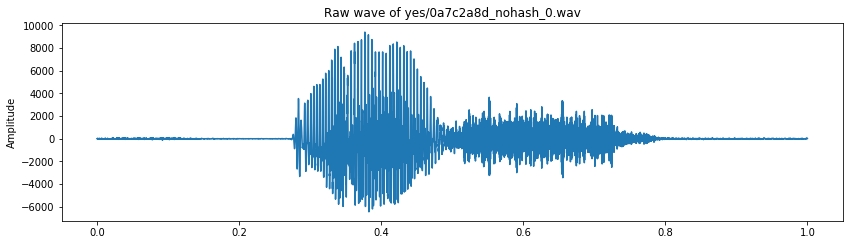

In [175]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

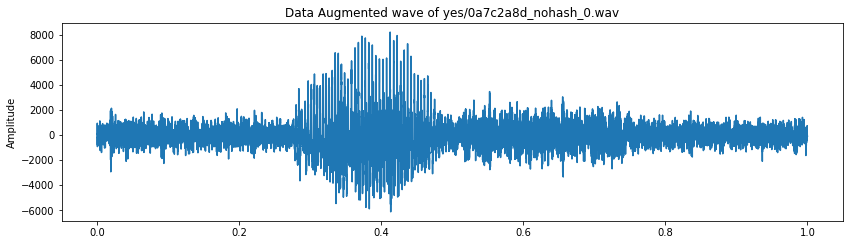

In [181]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Data Augmented wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(sample_aug), sample_rate), sample_aug)